In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
from sklearn.preprocessing import OneHotEncoder

### Load Dataset

In [2]:
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall.drop('CustomerID',axis=1,inplace=True)
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
mall.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

### Visulaizations

Gender Distribution

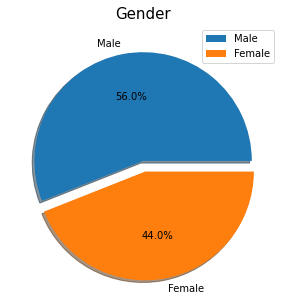

In [5]:
labels = ['Male','Female']
data = mall['Gender'].value_counts()
explode=[0,0.1]
colour = sns.color_palette()
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(data,labels=labels,colors=colour,explode=explode,autopct='%1.1f%%',shadow=True)
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

Age Distribution

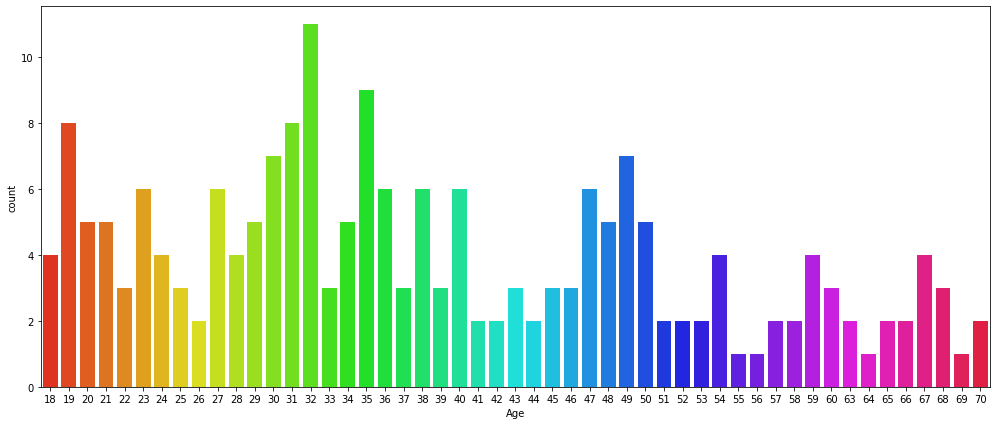

In [6]:
plt.rcParams['figure.figsize'] = (17, 7)
sns.countplot(x='Age',data=mall, palette = 'hsv')
plt.show()

Income and Spending Distribution

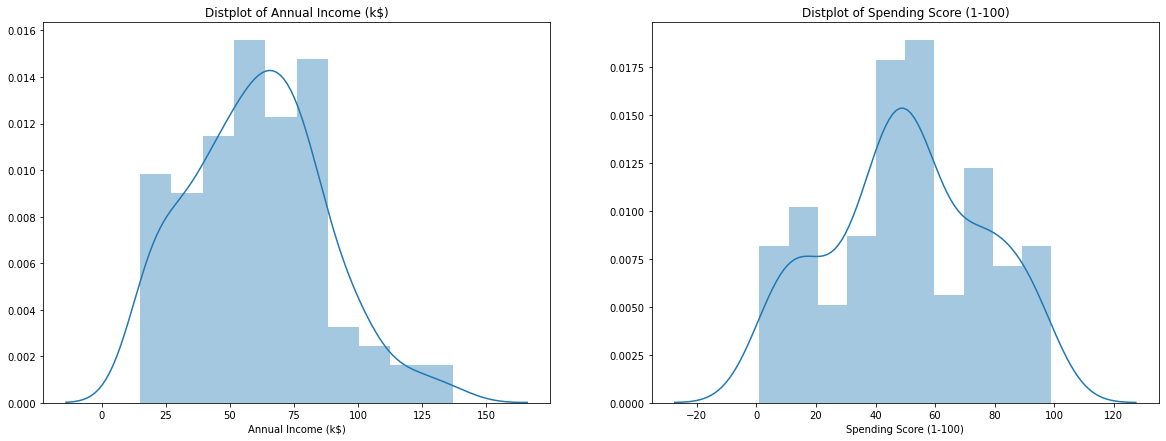

In [7]:
plt.rcParams['figure.figsize'] = (20, 7)
n = 0 
for i in ['Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,2,n)
    sns.distplot(mall[i],bins=10)
    plt.title('Distplot of {}'.format(i))
plt.show()

Relation between features

c:\python\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning:

invalid value encountered in greater



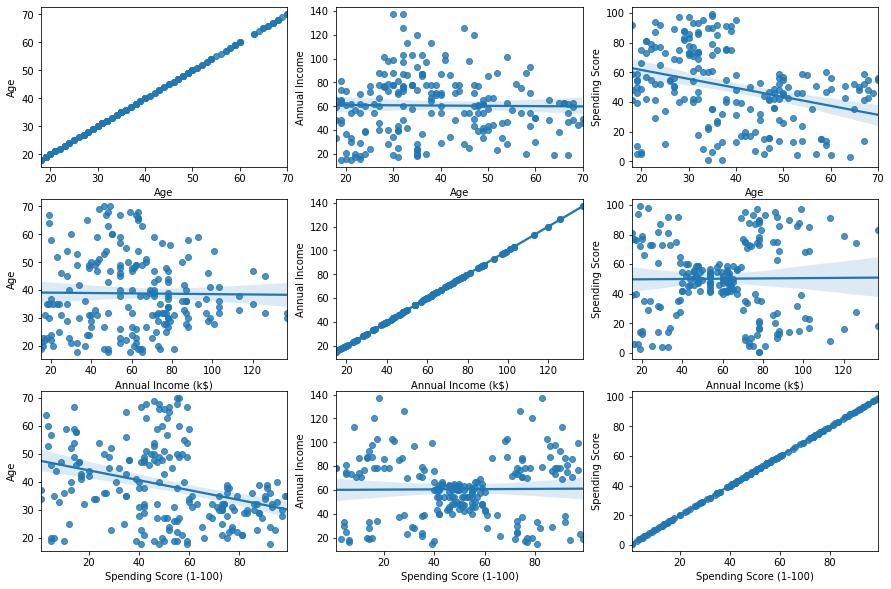

In [8]:
plt.figure(1 , figsize = (15 , 10))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        sns.regplot(x = x , y = y , data = mall)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Comparing Gender with Spending and Income

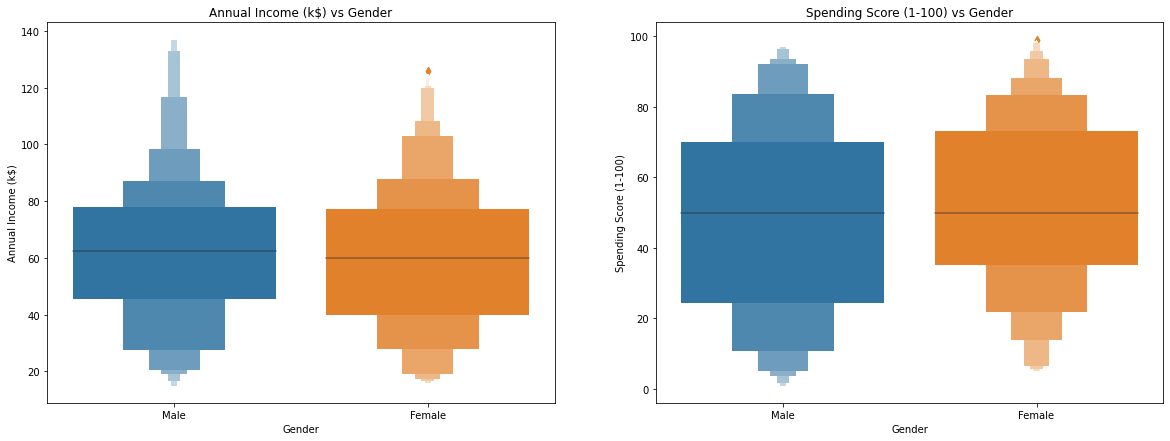

In [9]:
plt.rcParams['figure.figsize'] = (20, 7)
n=0
for i in ['Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,2,n)
    sns.boxenplot(mall['Gender'], mall[i])
    plt.title('{} vs Gender'.format(i))
plt.show()

Comparing features wrt Gender

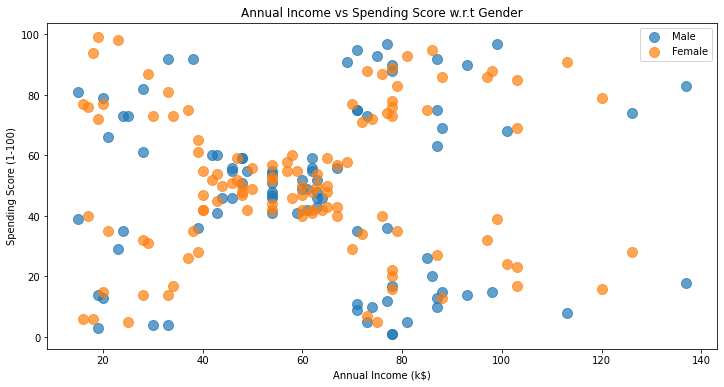

In [10]:
plt.rcParams['figure.figsize'] = (12, 6)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = mall[mall['Gender'] == gender] ,alpha=0.7,s=100, label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()    

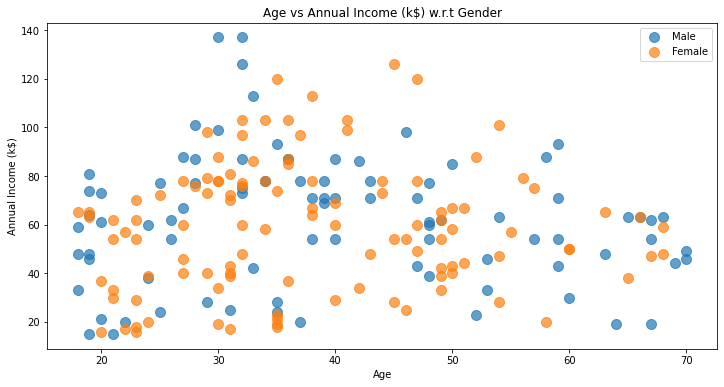

In [11]:
plt.rcParams['figure.figsize'] = (12, 6)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age',y = 'Annual Income (k$)' ,
                data = mall[mall['Gender'] == gender] ,alpha=0.7,s=100, label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income (k$) w.r.t Gender')
plt.legend()
plt.show()    

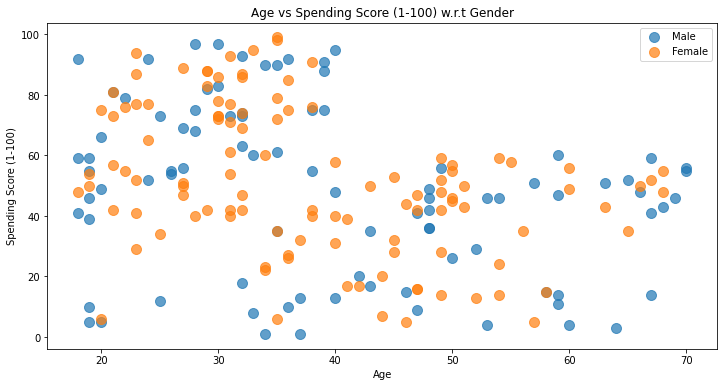

In [12]:
plt.rcParams['figure.figsize'] = (12, 6)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age',y = 'Spending Score (1-100)' ,
                data = mall[mall['Gender'] == gender] ,alpha=0.7,s=100, label = gender)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score (1-100) w.r.t Gender')
plt.legend()
plt.show()    

### K-means

## Clusttering using Age and Spending Score

In [13]:
data =mall[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
data.shape

(200, 2)

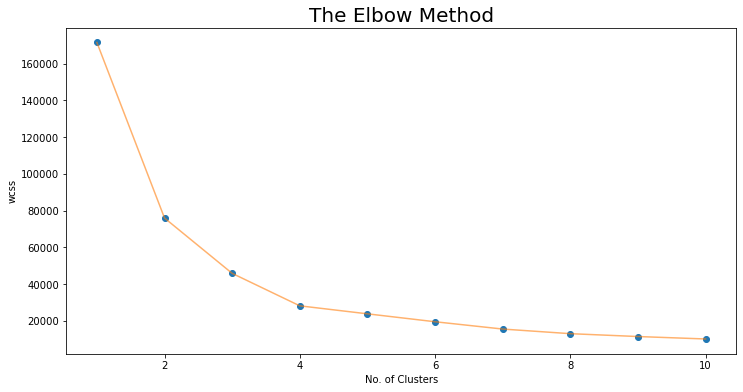

In [14]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,'o')
plt.plot(range(1, 11), wcss,'-',alpha=0.6)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()    

4 clusters seem correct

In [15]:
kmean = KMeans(n_clusters = 4)
kmean.fit(data)
Label=kmean.labels_
Centers = kmean.cluster_centers_

In [16]:
h = 0.02
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z1 = kmean.predict(np.c_[xx.ravel(), yy.ravel()])

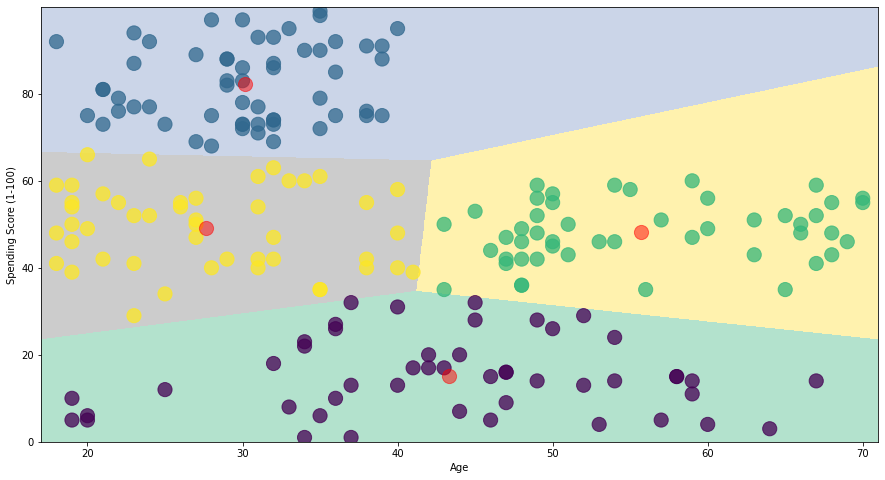

In [17]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.clf()
Z1 = Z1.reshape(xx.shape)
plt.imshow(Z1 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)', data=mall, c = Label,
            s = 200 ,alpha=0.75)
plt.scatter(x = Centers[: , 0] , y =  Centers[: , 1] , s = 200 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [18]:
df = mall[['Age' , 'Spending Score (1-100)']]

In [19]:
pd.DataFrame(data=Centers,columns=[df.columns])

,Age,Spending Score (1-100)
0,43.291667,15.020833
1,30.175439,82.350877
2,55.708333,48.229167
3,27.617021,49.148936


In [20]:
new_mall = pd.concat([mall, pd.DataFrame({'Cluster':Label})], axis = 1)
new_mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,3


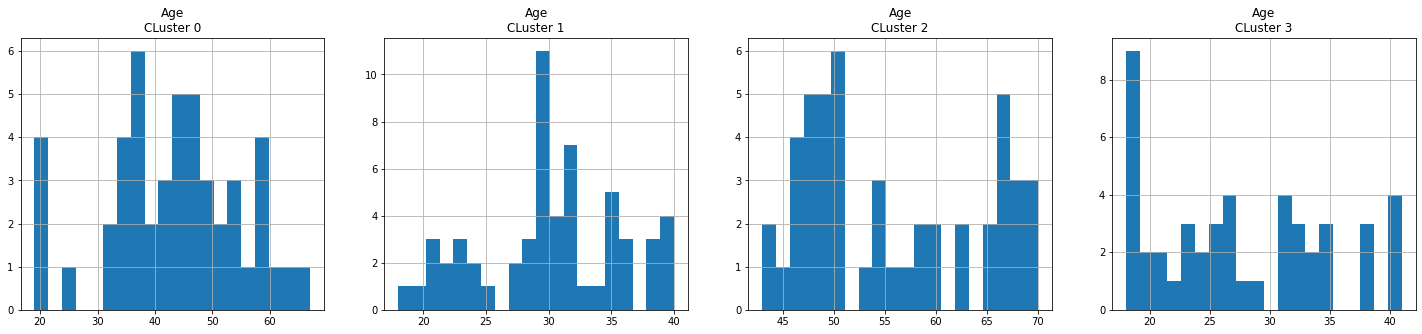

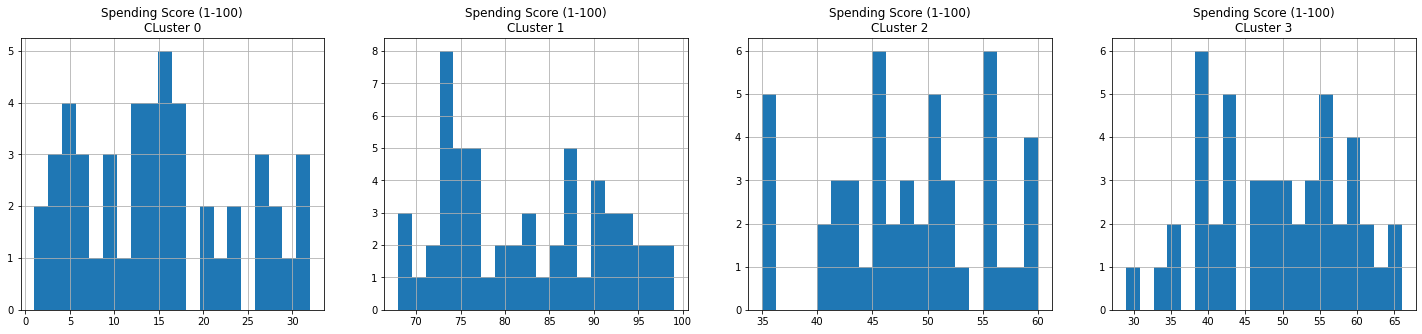

In [21]:
for i in df.columns:
    plt.figure(figsize = (25, 5))
    for j in range(4):
        plt.subplot(1,4,j+1)
        clus = new_mall[new_mall['Cluster']==j]
        clus[i].hist(bins=20)
        plt.title('{}\nCLuster {}'.format(i,j))
    plt.show()        

## Clusttering using Annual Income and Spending Score

In [22]:
data =mall[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
data.shape

(200, 2)

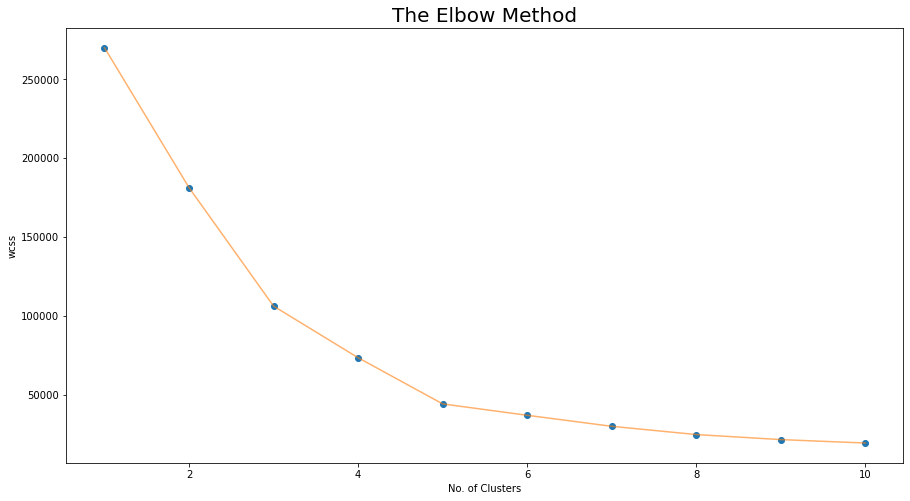

In [23]:
wcss1=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    wcss1.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss1,'o')
plt.plot(range(1, 11), wcss1,'-',alpha=0.6)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()    

5 clusters seem correct

In [24]:
kmean = KMeans(n_clusters = 5)
kmean.fit(data)
labels=kmean.labels_
centers = kmean.cluster_centers_

In [25]:
h = 0.02
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmean.predict(np.c_[xx.ravel(), yy.ravel()])

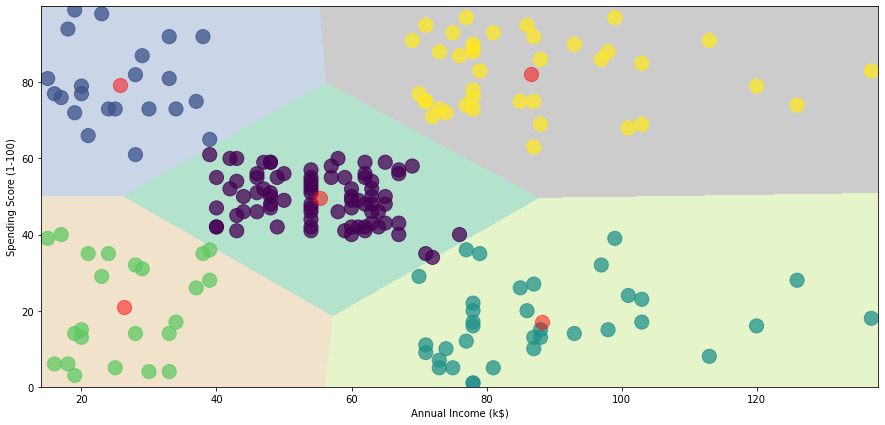

In [27]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)', data=mall, c = labels,
            s = 200 ,alpha=0.75)
plt.scatter(x = centers[: , 0] , y =  centers[: , 1] , s = 200 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

Cluster Summary

In [29]:
df1 = mall[['Annual Income (k$)' , 'Spending Score (1-100)']]

In [30]:
pd.DataFrame(data=centers,columns=[df1.columns])

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,25.727273,79.363636
2,88.200000,17.114286
3,26.304348,20.913043
4,86.538462,82.128205


In [31]:
new_mall = pd.concat([mall, pd.DataFrame({'Cluster':labels})], axis = 1)
new_mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3


Histogram for various clusters

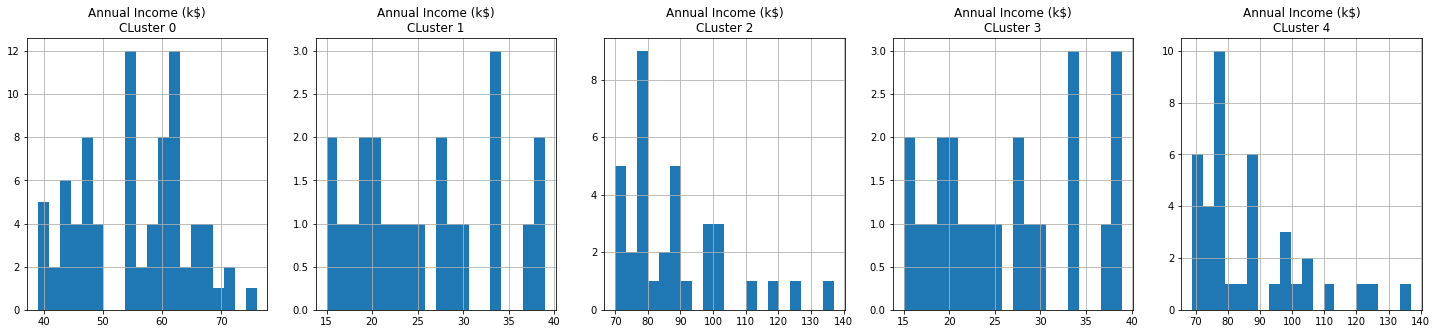

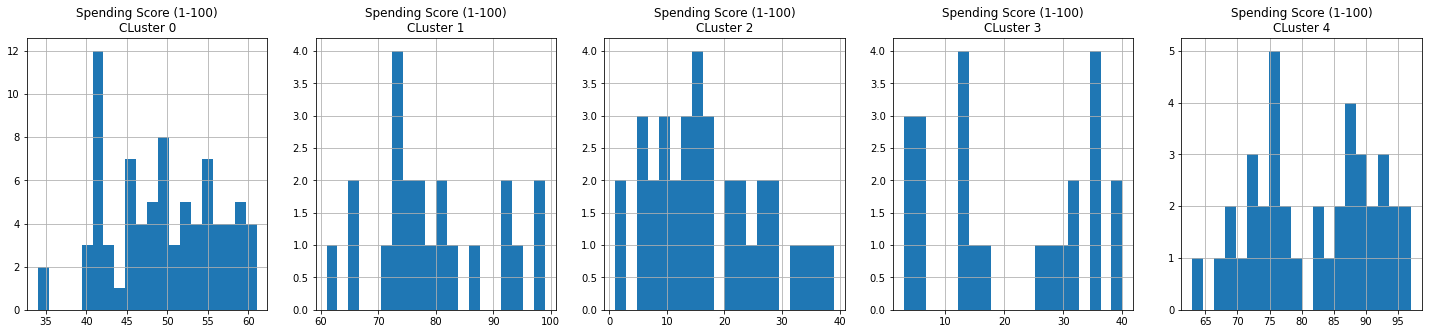

In [32]:
for i in df1.columns:
    plt.figure(figsize = (25, 5))
    for j in range(5):
        plt.subplot(1,5,j+1)
        clus = new_mall[new_mall['Cluster']==j]
        clus[i].hist(bins=20)
        plt.title('{}\nCLuster {}'.format(i,j))
    plt.show()        

## Clustering using Age, Annual Income and Spending Score

In [33]:
data1 =mall[['Age','Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
data1.shape

(200, 3)

c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:1032: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



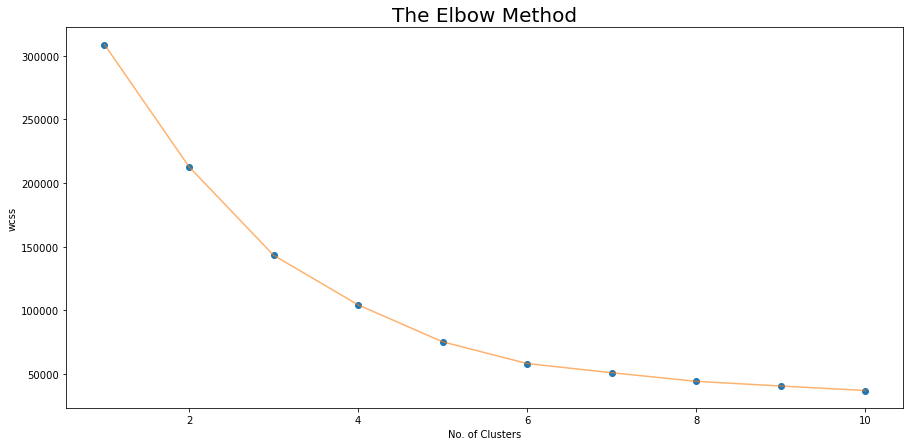

In [34]:
wcss2=[]
for i in range(1,11):
    kmeans1 = KMeans(n_clusters = i, algorithm='elkan')
    kmeans1.fit(data1)
    wcss2.append(kmeans1.inertia_)
    
plt.plot(range(1, 11), wcss2,'o')
plt.plot(range(1, 11), wcss2,'-',alpha=0.6)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()    

6 cluster seem correct

In [35]:
kmean1 = KMeans(n_clusters = 6,algorithm='elkan')
kmean1.fit(data1)
labels1=kmean1.labels_
centers1 = kmean1.cluster_centers_

Cluster Summary

In [36]:
df2 = mall[['Age','Annual Income (k$)' , 'Spending Score (1-100)']]

In [37]:
pd.DataFrame(data=centers1,columns=[df2.columns])

,Age,Annual Income (k$),Spending Score (1-100)
0,27.000000,56.657895,49.131579
1,32.692308,86.538462,82.128205
2,41.685714,88.228571,17.285714
3,56.155556,53.377778,49.088889
4,25.272727,25.727273,79.363636
5,44.142857,25.142857,19.523810


In [38]:
new_mall1 = pd.concat([mall, pd.DataFrame({'Cluster':labels1})], axis = 1)
new_mall1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,5
1,Male,21,15,81,4
2,Female,20,16,6,5
3,Female,23,16,77,4
4,Female,31,17,40,5


In [39]:
trace1 = go.Scatter3d(
    x= mall['Age'],
    y= mall['Spending Score (1-100)'],
    z= mall['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = new_mall1['Cluster'], 
        size= 8,
        line=dict(
            color= new_mall1['Cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
dff  = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=dff, layout=layout)
py.offline.iplot(fig)

Histograms for various clusters

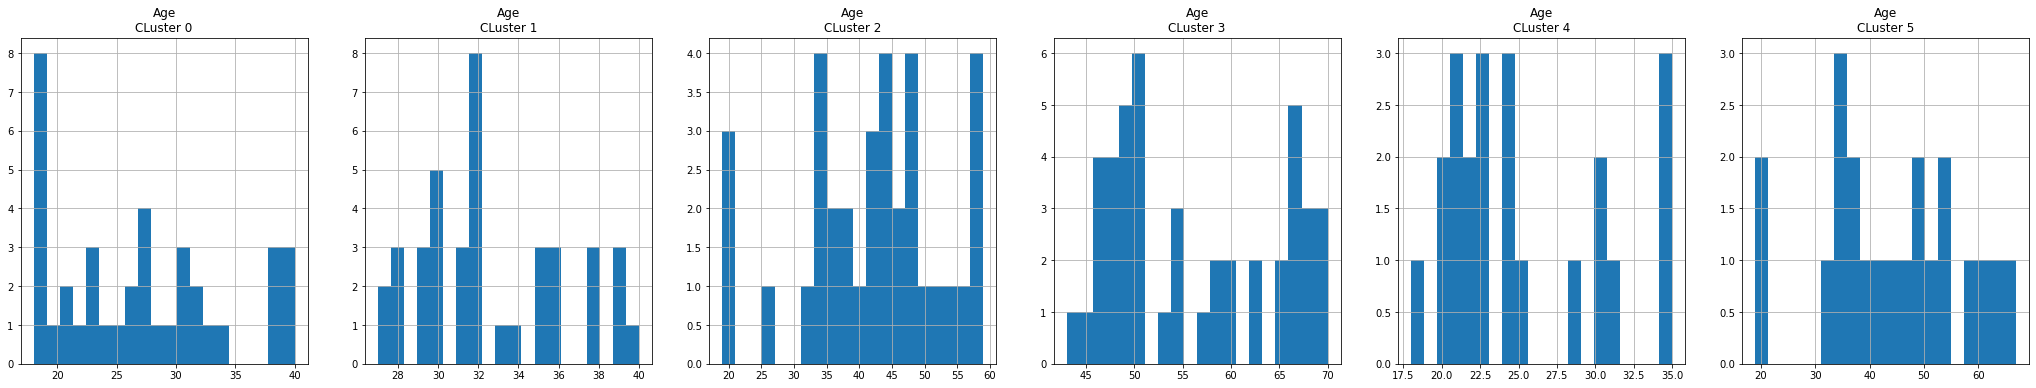

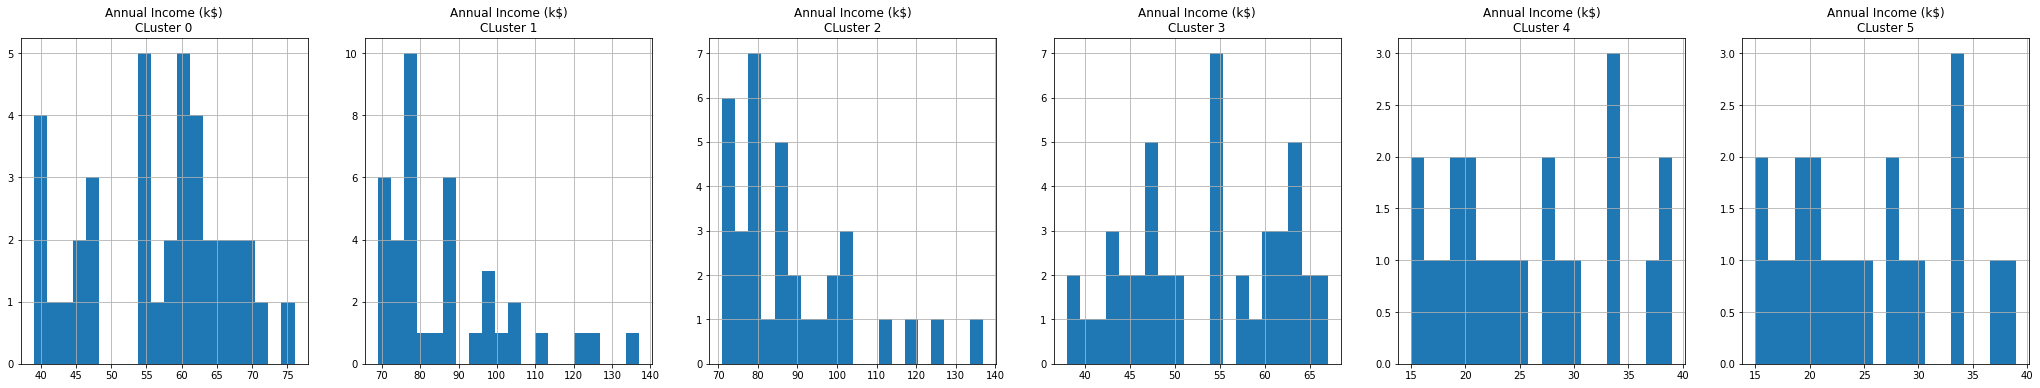

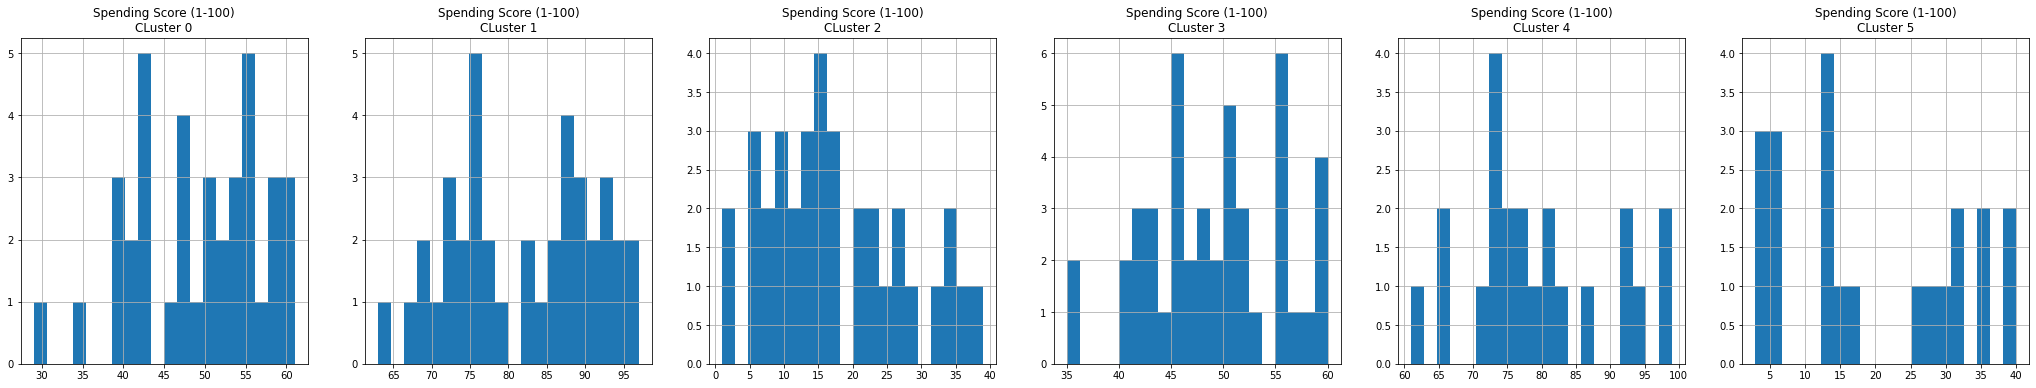

In [40]:
for i in df2.columns:
    plt.figure(figsize = (36, 6))
    for j in range(6):
        plt.subplot(1,6,j+1)
        clus = new_mall[new_mall1['Cluster']==j]
        clus[i].hist(bins=20)
        plt.title('{}\nCLuster {}'.format(i,j))
    plt.show()        

PCA

In [42]:
pca = PCA(n_components=2)
df.dropna(inplace=True)
principal_comp = pca.fit_transform(df2)

In [43]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-31.870508,-33.001425
1,0.763397,-56.843865
2,-57.408726,-13.122936
3,-2.169896,-53.477905
4,-32.174920,-30.387005


In [44]:
pca_df = pd.concat([pca_df,pd.DataFrame({'Cluster':labels1})], axis = 1)
pca_df.head()

,pca1,pca2,Cluster
0,-31.870508,-33.001425,5
1,0.763397,-56.843865,4
2,-57.408726,-13.122936,5
3,-2.169896,-53.477905,4
4,-32.174920,-30.387005,5


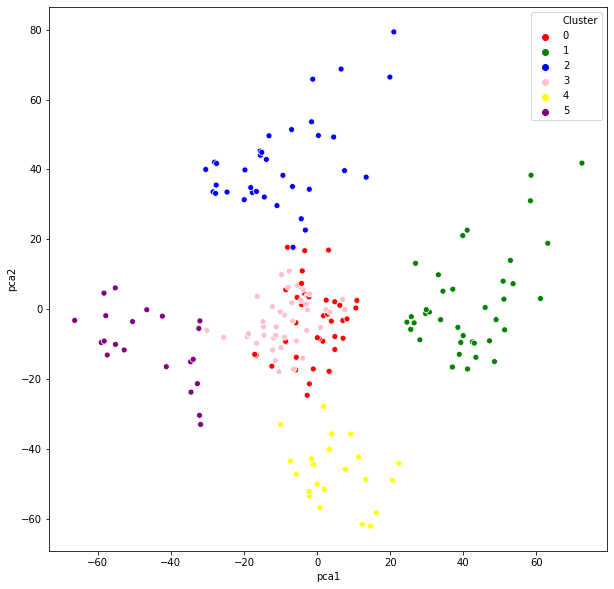

In [45]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "Cluster", data = pca_df, palette =['red','green','blue','pink','yellow','purple'])
plt.show()